In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Amazon Sale Report.csv',low_memory=False)

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.shape

(128975, 24)

In [5]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [6]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [8]:
df['ship-service-level']

0          Standard
1          Standard
2         Expedited
3          Standard
4         Expedited
            ...    
128970    Expedited
128971    Expedited
128972    Expedited
128973    Expedited
128974    Expedited
Name: ship-service-level, Length: 128975, dtype: object

In [9]:

# Check the shape of the DataFrame
print("DataFrame Shape:", df.shape)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Check the columns
print("Columns:", df.columns.tolist())

# Inspect the first few rows
print("First few rows:\n", df.head())

# List all columns with their types
for col in df.columns:
    print(f"Column: '{col}', Type: {df[col].dtype}")


DataFrame Shape: (128975, 24)
Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']
First few rows:
    index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level    Style              SKU  \
0   Merchant     Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant     Amazon.in           Standard  JNE378

In [10]:
print(df['Category'].head())


0              Set
1            kurta
2            kurta
3    Western Dress
4              Top
Name: Category, dtype: object


In [11]:

# Create DataFrame
df = pd.DataFrame(df)

# Calculate total delivery cost per order
total_cost = df.groupby('ship-service-level')['Amount'].sum().reset_index()
total_cost.columns = ['Ship Service Level', 'Total Delivery Cost']

# Print the results
print(total_cost)

# Optionally, calculate the overall total delivery cost
overall_total = df['Amount'].sum()
print(f"\nOverall Total Delivery Cost: {overall_total:.2f} INR")


  Ship Service Level  Total Delivery Cost
0          Expedited           54285183.0
1           Standard           24307495.3

Overall Total Delivery Cost: 78592678.30 INR


In [12]:

# Create DataFrame
df = pd.DataFrame(df)

# Calculate total delivery cost per order
total_cost = df.groupby('ship-service-level')['Amount'].sum().reset_index()
total_cost.columns = ['Ship Service Level', 'Total Delivery Cost']

# Print the results
print(total_cost)

# Optionally, calculate the overall total delivery cost
overall_total = df['Amount'].sum()
print(f"\nOverall Total Delivery Cost: {overall_total:.2f} INR")


  Ship Service Level  Total Delivery Cost
0          Expedited           54285183.0
1           Standard           24307495.3

Overall Total Delivery Cost: 78592678.30 INR


In [13]:
from sklearn.preprocessing import LabelEncoder

# Check the columns first
print(df.columns.tolist())  # Ensure 'Category' and 'ship-state' are present

# Create a copy to preserve original columns
df_encoded = df.copy()

# Encode categorical variables only if they exist
if 'Category' in df_encoded.columns and 'ship-state' in df_encoded.columns:
    label_encoder = LabelEncoder()
    df_encoded['Category'] = label_encoder.fit_transform(df_encoded['Category'])
    df_encoded['ship-state'] = label_encoder.fit_transform(df_encoded['ship-state'])
else:
    print("Columns 'Category' or 'ship-state' not found.")


['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [14]:
print(df['Category'].isnull().sum())


0


In [15]:
print(df.isnull().sum()) 

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [16]:
df.dropna(subset=['ship-city', 'ship-postal-code', 'ship-country'], inplace=True)


In [30]:
## df.drop(columns=['Courier Status', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22'], inplace=True)


In [31]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Fill missing values
df['ship-city'] = df['ship-city'].fillna('Unknown')
df['ship-postal-code'] = df['ship-postal-code'].fillna('Unknown')
df['ship-country'] = df['ship-country'].fillna('Unknown')

# Check and fill 'Courier Status'
if 'Courier Status' in df.columns:
    df['Courier Status'] = df['Courier Status'].fillna('Not Specified')
else:
    print("Column 'Courier Status' not found.")

# Fill missing values in 'Qty' with the mean
if df['Qty'].isnull().any():
    df['Qty'] = df['Qty'].fillna(df['Qty'].mean())

# Verify changes
print(df.isnull().sum())


Column 'Courier Status' not found.
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
is_cancelled          0
dtype: int64


In [32]:
# Fill missing values without using inplace=True
df['ship-city'] = df['ship-city'].fillna('Unknown')
df['ship-postal-code'] = df['ship-postal-code'].fillna('Unknown')
df['ship-country'] = df['ship-country'].fillna('Unknown')
df['Status'] = df['Status'].fillna('Not Specified')
df['Qty'] = df['Qty'].fillna(df['Qty'].mean())  # Fill with mean for quantity

# Check for remaining NaN values
print(df.isnull().sum())


index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
is_cancelled          0
dtype: int64


In [20]:
print(df.isnull().sum())  # Check for remaining missing values


index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Qty                      0
currency              7793
Amount                7793
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
B2B                      0
dtype: int64


In [33]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Ensure Amount is numeric


In [34]:
print(df['Amount'].isna().sum())


0


In [35]:
print("NaN values in 'Amount':", df['Amount'].isna().sum())


NaN values in 'Amount': 0


NaN values in 'Amount': 0


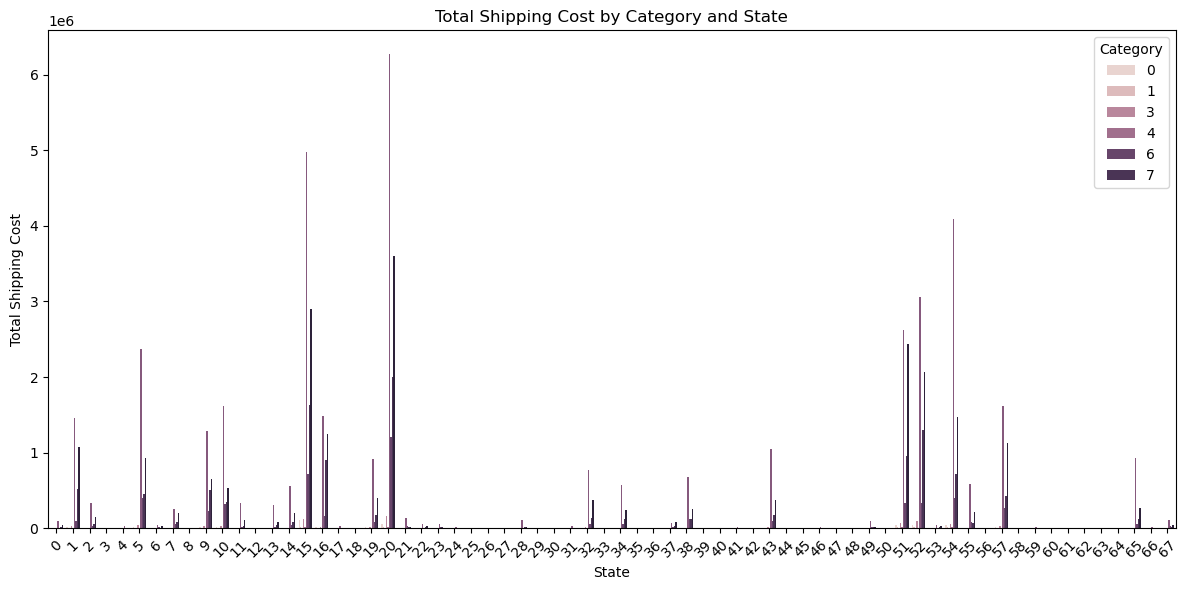

Model R^2 Score: 0.21


In [37]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


# Check for NaN values in 'Amount'
print("NaN values in 'Amount':", df['Amount'].isna().sum())

# Drop rows with NaN values in 'Amount'
df = df.dropna(subset=['Amount'])

# Fill NaN values (if needed, but in this case, we dropped them)
# df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

# 1. Calculate total shipping costs by category and region
category_shipping = df.groupby(['Category', 'ship-state'])['Amount'].sum().reset_index()
category_shipping.columns = ['Category', 'State', 'Total Shipping Cost']

# 2. Identify patterns in order quantities
quantity_trends = df.groupby(['ship-state', 'Category'])['Qty'].sum().reset_index()
quantity_trends.columns = ['State', 'Category', 'Total Quantity']

# 3. Merge trends for analysis
merged_trends = pd.merge(category_shipping, quantity_trends, on=['State', 'Category'])

# 4. Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_trends, x='State', y='Total Shipping Cost', hue='Category')
plt.title('Total Shipping Cost by Category and State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Using Machine Learning to predict shipping costs
# Encode categorical variables
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'].astype(str))
df['ship-state'] = label_encoder.fit_transform(df['ship-state'].astype(str))

# Define features and target
X = df[['Qty', 'Category', 'ship-state']]
y = df['Amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'Model R^2 Score: {score:.2f}')


In [38]:
print(df.isnull().sum())


index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
is_cancelled          0
dtype: int64


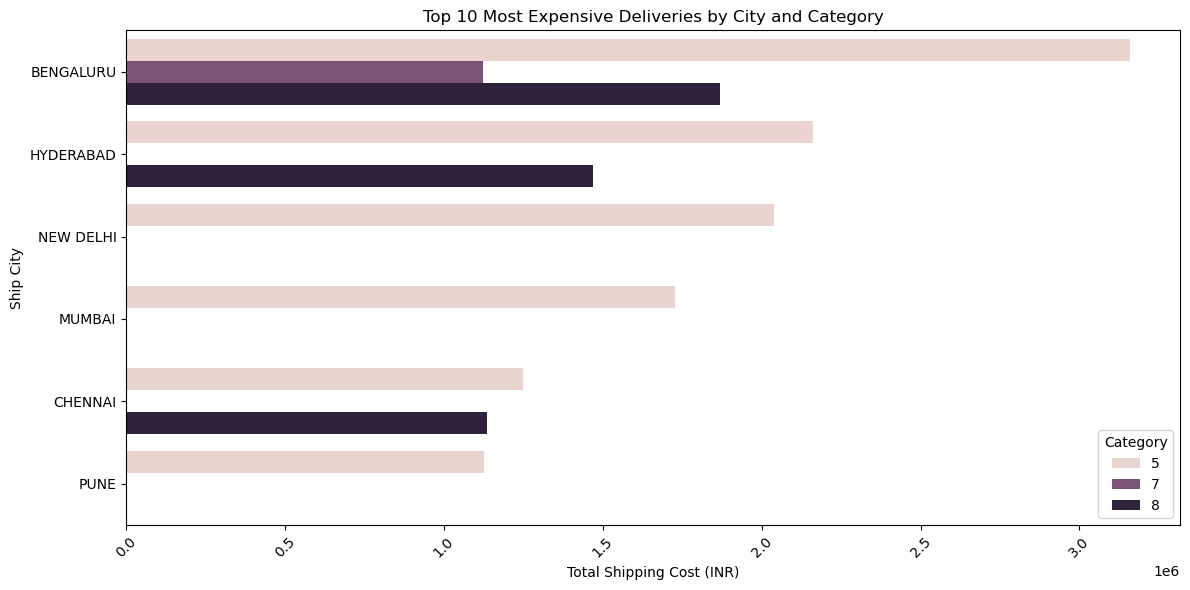

       ship-city  ship-state  Category      Amount
1361   BENGALURU           7         5  3158687.66
4992   HYDERABAD          48         5  2160340.30
9181   NEW DELHI          45         5  2038111.72
1364   BENGALURU           7         8  1867564.81
8232      MUMBAI          13         5  1726996.56
4995   HYDERABAD          48         8  1468109.30
2500     CHENNAI          47         5  1249230.35
2503     CHENNAI          47         8  1135773.71
10493       PUNE          13         5  1126364.34
1363   BENGALURU           7         7  1123697.16


In [39]:
# 1. Group by ship-city, ship-state, and Category to find total shipping costs
cost_categories = df.groupby(['ship-city', 'ship-state', 'Category'])['Amount'].sum().reset_index()

# 2. Identify the top 10 most expensive delivery locations and categories
top_costs = cost_categories.sort_values(by='Amount', ascending=False).head(10)

# 3. Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=top_costs, x='Amount', y='ship-city', hue='Category')
plt.title('Top 10 Most Expensive Deliveries by City and Category')
plt.xlabel('Total Shipping Cost (INR)')
plt.ylabel('Ship City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top costs for further inspection
print(top_costs)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'is_cancelled'],
      dtype='object')
Shipping Methods Comparison:
  ship-service-level  total_orders  total_amount  average_cost  percentage
0          Expedited         82986    54274317.0    656.239852   71.260755
1           Standard         33468    24299690.3    632.080176   28.739245

Cancellation Rates:
  ship-service-level  cancellation_rate
0          Expedited           6.800073
1           Standard          13.362293


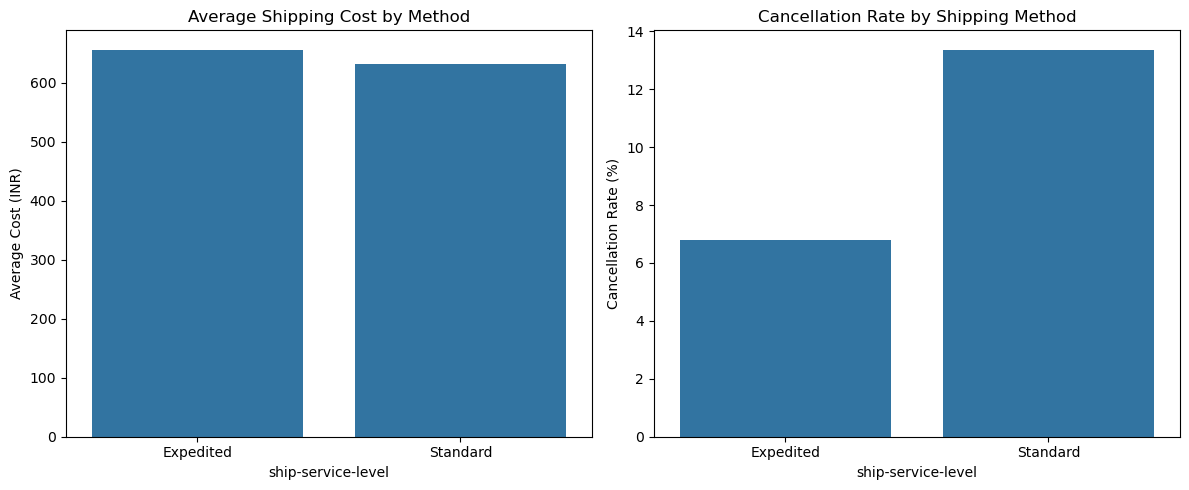

In [40]:
# Print the DataFrame columns for debugging
print(df.columns)

# a. Compare Shipping Methods
shipping_comparison = df.groupby('ship-service-level').agg(
    total_orders=('Qty', 'sum'),
    total_amount=('Amount', 'sum'),
    average_cost=('Amount', 'mean'),
).reset_index()

# Calculate percentage of expedited orders
total_orders = shipping_comparison['total_orders'].sum()
shipping_comparison['percentage'] = (shipping_comparison['total_orders'] / total_orders) * 100

# Print shipping comparison results
print("Shipping Methods Comparison:")
print(shipping_comparison)

# b. Assess Cancellation Rates
# Check if 'Courier Status' exists or use another column for cancellation indication
if 'Courier Status' in df.columns:
    df['is_cancelled'] = df['Courier Status'].isnull()  # True if status is None (not shipped)
else:
    # Use alternative logic if 'Courier Status' is missing
    df['is_cancelled'] = df['Status'].str.contains("Cancelled", na=False)  # Update accordingly

# Calculate cancellation rates
cancellation_rate = df.groupby('ship-service-level')['is_cancelled'].mean().reset_index()
cancellation_rate['cancellation_rate'] = cancellation_rate['is_cancelled'] * 100  # Convert to percentage

# Print cancellation rates
print("\nCancellation Rates:")
print(cancellation_rate[['ship-service-level', 'cancellation_rate']])

# Visualizing the results
plt.figure(figsize=(12, 5))

# Subplot for shipping cost comparison
plt.subplot(1, 2, 1)
sns.barplot(data=shipping_comparison, x='ship-service-level', y='average_cost')
plt.title('Average Shipping Cost by Method')
plt.ylabel('Average Cost (INR)')

# Subplot for cancellation rates
plt.subplot(1, 2, 2)
sns.barplot(data=cancellation_rate, x='ship-service-level', y='cancellation_rate')
plt.title('Cancellation Rate by Shipping Method')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()


In [41]:
# 1. Optimize Shipping Routes
route_frequencies = df.groupby(['ship-city', 'ship-state']).size().reset_index(name='frequency')
top_routes = route_frequencies.sort_values(by='frequency', ascending=False)
print("Top Shipping Routes:")
print(top_routes.head(10))

# 2. Negotiate with Couriers
df['Courier'] = df['ship-service-level'].apply(lambda x: 'Expedited' if x == 'Expedited' else 'Standard')
courier_analysis = df.groupby('Courier').agg(
    total_orders=('Qty', 'sum'),
    total_cost=('Amount', 'sum'),
    average_cost=('Amount', 'mean')
).reset_index()
print("\nCourier Analysis:")
print(courier_analysis)

# 3. Standardize Service Levels
potential_switch = df[df['ship-service-level'] == 'Expedited'].copy()
potential_switch['savings'] = potential_switch['Amount'] * 0.15  # Assuming a 15% cost reduction for Standard
potential_savings_summary = potential_switch.agg(
    total_potential_savings=('savings', 'sum'),
    total_orders=('Qty', 'sum')
)
print("\nPotential Savings from Switching to Standard Shipping:")
print(potential_savings_summary)


Top Shipping Routes:
      ship-city  ship-state  frequency
767   BENGALURU           7      10685
2879  HYDERABAD          48       7598
4754     MUMBAI          13       5867
5336  NEW DELHI          45       5440
1453    CHENNAI          47       5130
6107       PUNE          13       3657
3689    KOLKATA          53       2245
2593   GURUGRAM           2       1783
7539      THANE          13       1607
4364    LUCKNOW          50       1354

Courier Analysis:
     Courier  total_orders  total_cost  average_cost
0  Expedited         82986  54274317.0    656.239852
1   Standard         33468  24299690.3    632.080176

Potential Savings from Switching to Standard Shipping:
                            savings      Qty
total_potential_savings  8141147.55      NaN
total_orders                    NaN  82986.0


In [42]:
# a. Evaluate Customer Preferences
shipping_preferences = df.groupby('ship-service-level').agg(
    total_orders=('Qty', 'sum'),
    total_revenue=('Amount', 'sum'),
    average_order_value=('Amount', 'mean')
).reset_index()

shipping_preferences['expedited_percentage'] = (
    shipping_preferences['total_orders'] / shipping_preferences['total_orders'].sum() * 100
)

print("\nCustomer Shipping Preferences:")
print(shipping_preferences)

# b. Promote Cost-Effective Options
expedited_customers = df[df['ship-service-level'] == 'Expedited'].groupby('Sales Channel').agg(
    total_expedited_orders=('Qty', 'sum'),
    total_expedited_revenue=('Amount', 'sum')
).reset_index()

expedited_customers['suggested_discount'] = expedited_customers['total_expedited_revenue'] * 0.10

print("\nExpedited Shipping Customers Insights:")
print(expedited_customers)

standard_shipping_incentives = {
    'message': 'Promote Standard Shipping with a 10% discount on future purchases.',
    'target_customers': expedited_customers['Sales Channel'].tolist()
}

print("\nIncentive Campaign Suggestion:")
print(standard_shipping_incentives)



Customer Shipping Preferences:
  ship-service-level  total_orders  total_revenue  average_order_value  \
0          Expedited         82986     54274317.0           656.239852   
1           Standard         33468     24299690.3           632.080176   

   expedited_percentage  
0             71.260755  
1             28.739245  

Expedited Shipping Customers Insights:
  Sales Channel  total_expedited_orders  total_expedited_revenue  \
0     Amazon.in                   82986               54274317.0   

   suggested_discount  
0           5427431.7  

Incentive Campaign Suggestion:
{'message': 'Promote Standard Shipping with a 10% discount on future purchases.', 'target_customers': ['Amazon.in']}


In [43]:
# a. Pilot Testing
pilot_region = 'MAHARASHTRA'
pilot_category = 'kurta'

# Filter data for the pilot test
pilot_data = df[(df['ship-state'] == pilot_region) & (df['Category'] == pilot_category)]

# Calculate initial metrics before implementing changes
initial_metrics = {
    'total_orders': pilot_data['Qty'].sum(),
    'total_revenue': pilot_data['Amount'].sum(),
    'average_shipping_cost': pilot_data['Amount'].mean(),
}

print("\nInitial Metrics for Pilot Test:")
print(initial_metrics)

# Assume you implement cost-cutting measures here (e.g., promoting Standard shipping)
# After implementation, calculate metrics again (using hypothetical new data)
new_data = pilot_data.copy()
new_data['Amount'] *= 0.9  # Assume a 10% cost reduction

# Calculate new metrics
new_metrics = {
    'total_orders': new_data['Qty'].sum(),
    'total_revenue': new_data['Amount'].sum(),
    'average_shipping_cost': new_data['Amount'].mean(),
}

print("\nNew Metrics After Pilot Implementation:")
print(new_metrics)

# b. Continuous Monitoring
def monitor_kpis(original_data, new_data):
    kpi_comparison = {
        'total_orders_change': new_data['Qty'].sum() - original_data['Qty'].sum(),
        'total_revenue_change': new_data['Amount'].sum() - original_data['Amount'].sum(),
        'average_shipping_cost_change': new_data['Amount'].mean() - original_data['Amount'].mean(),
    }
    return kpi_comparison

# Monitor KPIs after the pilot test
kpi_results = monitor_kpis(pilot_data, new_data)
print("\nKPI Comparison After Pilot Testing:")
print(kpi_results)

# Example of tracking customer satisfaction
customer_satisfaction = {
    'pre_implementation_satisfaction': 75,  # Example score out of 100
    'post_implementation_satisfaction': 80,  # Example score out of 100
}

print("\nCustomer Satisfaction Scores:")
print(customer_satisfaction)


Initial Metrics for Pilot Test:
{'total_orders': 0, 'total_revenue': 0.0, 'average_shipping_cost': nan}

New Metrics After Pilot Implementation:
{'total_orders': 0, 'total_revenue': 0.0, 'average_shipping_cost': nan}

KPI Comparison After Pilot Testing:
{'total_orders_change': 0, 'total_revenue_change': 0.0, 'average_shipping_cost_change': nan}

Customer Satisfaction Scores:
{'pre_implementation_satisfaction': 75, 'post_implementation_satisfaction': 80}


C:\Users\Bhanu Bisht\AppData\Local\Temp\ipykernel_17624\3608408788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ship-service-level', y='Amount', data=shipping_costs, ax=ax1, palette='viridis')


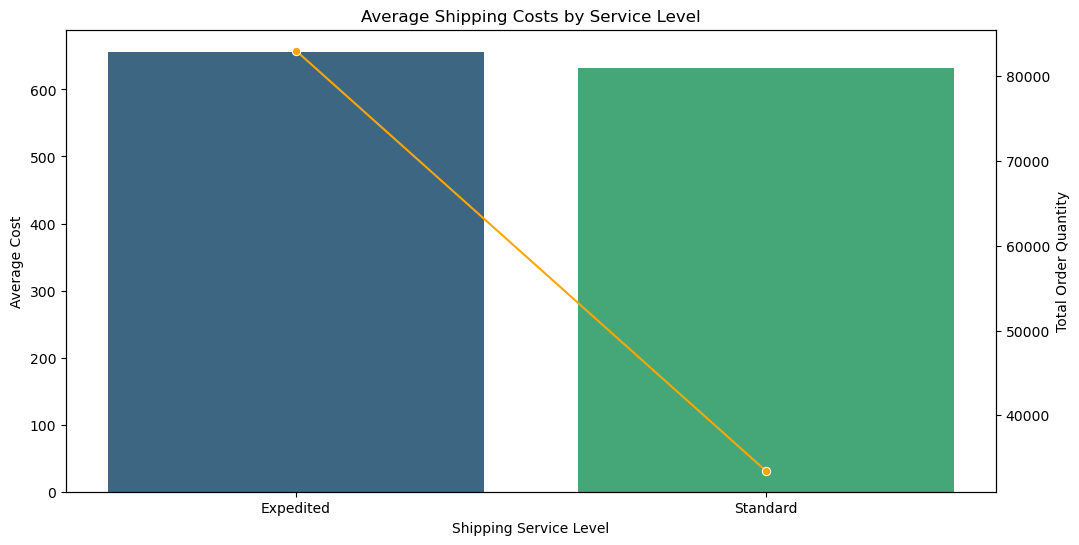

In [44]:
# Group by shipping service level
shipping_costs = df.groupby('ship-service-level')['Amount'].mean().reset_index()
order_quantities = df.groupby('ship-service-level')['Qty'].sum().reset_index()

# Create a figure with subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average shipping costs
sns.barplot(x='ship-service-level', y='Amount', data=shipping_costs, ax=ax1, palette='viridis')
ax1.set_title('Average Shipping Costs by Service Level')
ax1.set_ylabel('Average Cost')
ax1.set_xlabel('Shipping Service Level')

# Create a second y-axis for order quantities
ax2 = ax1.twinx()
sns.lineplot(x='ship-service-level', y='Qty', data=order_quantities, ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Total Order Quantity')

plt.show()

C:\Users\Bhanu Bisht\AppData\Local\Temp\ipykernel_17624\3788998634.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Satisfaction Score', data=satisfaction_df, palette='coolwarm')


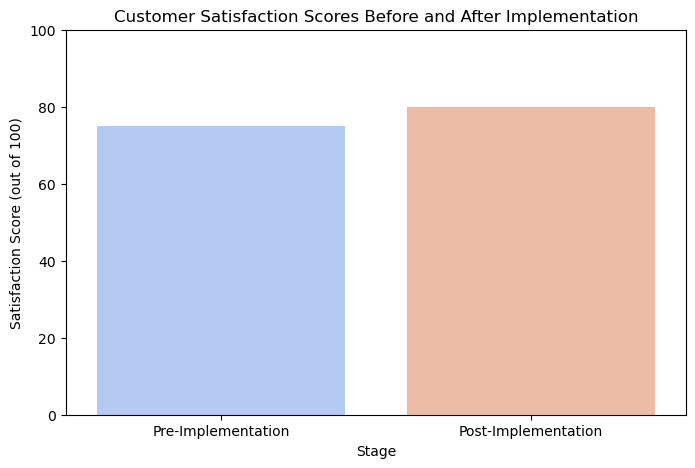

In [45]:
# Sample customer satisfaction data
satisfaction_data = {
    'Stage': ['Pre-Implementation', 'Post-Implementation'],
    'Satisfaction Score': [75, 80]
}
satisfaction_df = pd.DataFrame(satisfaction_data)

# Plotting customer satisfaction scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Stage', y='Satisfaction Score', data=satisfaction_df, palette='coolwarm')
plt.title('Customer Satisfaction Scores Before and After Implementation')
plt.ylim(0, 100)
plt.ylabel('Satisfaction Score (out of 100)')
plt.show()


C:\Users\Bhanu Bisht\AppData\Local\Temp\ipykernel_17624\3315116863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Measure', y='Potential Savings ($)', data=savings_df, palette='pastel')


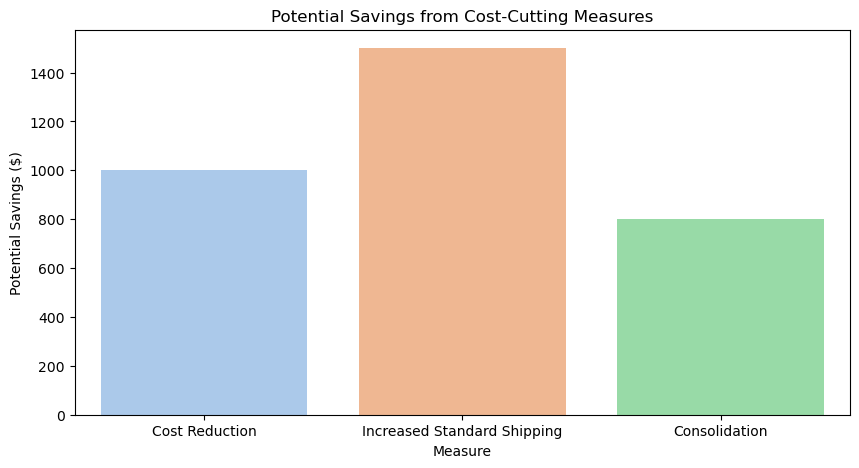

In [46]:
# Sample potential savings data
savings_data = {
    'Measure': ['Cost Reduction', 'Increased Standard Shipping', 'Consolidation'],
    'Potential Savings ($)': [1000, 1500, 800]
}
savings_df = pd.DataFrame(savings_data)

# Plotting potential savings
plt.figure(figsize=(10, 5))
sns.barplot(x='Measure', y='Potential Savings ($)', data=savings_df, palette='pastel')
plt.title('Potential Savings from Cost-Cutting Measures')
plt.ylabel('Potential Savings ($)')
plt.show()
